**BACKGROUD PROJECT**

DQLab Telco is a telcommunications company that has many branches in Indonesia. Since its establishment in 2019, DQLab Telco has consistently paid attention to customer experience to avoid being abandoned by customers.

Despite being only 1 year old, DQLab Telco had a problem where customers started switching to competitors. The management want to reduce the amount of customer switching by using machine learning.

**PROJECT STEPS**

1.   Exploratory Data Analysis
2.   Data Pre-Processing
3.   Machine Learning Modeling
4.   Determining the Best Model


Import libraries that we use

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [27]:
# LOAD DATASET

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [28]:
df.describe()

,UpdatedAt,customerID,tenure,MonthlyCharges,TotalCharges
count,6950.0,6.950000e+03,6950.000000,6950.000000,6950.000000
mean,202006.0,4.549898e+10,32.423165,64.992201,2286.058750
std,0.0,2.854091e+08,24.581073,30.032040,2265.702553
min,202006.0,4.500026e+10,0.000000,0.000000,19.000000
25%,202006.0,4.525607e+10,9.000000,36.462500,406.975000
50%,202006.0,4.549871e+10,29.000000,70.450000,1400.850000
75%,202006.0,4.574384e+10,55.000000,89.850000,3799.837500
max,202006.0,4.599959e+10,124.000000,169.931250,8889.131250


In [29]:
# Print total rows and columns

print("Total Rows = ", df.shape[0],"\nTotal Columns = ", df.shape[1])

Total Rows =  6950 
Total Columns =  13


Dataset description =

1.   UpdatedAt = Periode of Data taken
2.   customerID = Customer ID
3.   gender = Whether the customer is a male or a female (Male, Female)
4.   SeniorCitizen = Whether the customer is a senior citizen or not (Yes, No)
5.   Partner = Whether the customer has a partner or not (Yes, No)
6.   tenure = Number of months the customer has stayed with the company
7.   PhoneService = Whether the customer has a phone service or not (Yes, No)
8.   InternetService = Customer’s internet service provider (Yes, No)
9.   StreamingTV = Whether the customer has streaming TV or not (Yes, No)
10.  PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
11.  MonthlyCharges = The amount charged to the customer monthly
12.  TotalCharges = The total amount charged to the customer
13.  Churn = Whether the customer churned or not (Yes, No)

# EDA

The purpose of Exploratory Data Analysis is to understand the content of the data used such as data distribution, frequency, correlation and others. In general EDA is done in several ways :

1.  Uviraiate Analysis - descriptive analysis with one variable
2.  Bivariate Analysis - an analysis in which 2 variables are observed. One variable here is the dependent variable while the other variable is the independent variable
3. Multivariate Analysis - an analysis that uses more than one or equal tothree variables

In this project i will calculate the poportion of customer churn and the data distribution of predictor variables on the label (Churn)

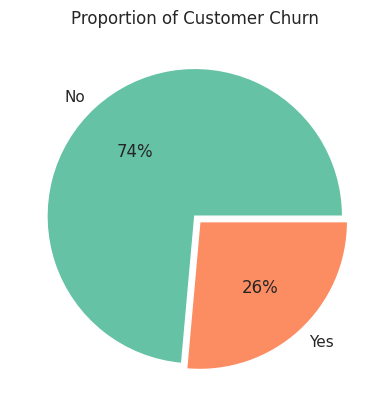

In [30]:
# Customer Churn Proportion

# Data customer churn
churn = df['Churn'].value_counts()

# Pie Chart Visualization
plt.pie(churn, labels = ['No','Yes'],
        colors = sns.color_palette('Set2'),
        explode = [0, 0.05],
        autopct = '%.0f%%')
plt.title('Proportion of Customer Churn')
plt.show()

Based on the pie chart visualization, it can be seen that 26% of customers move to competitors (Churn)

array([<Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>,
       <Axes: title={'center': 'tenure'}>], dtype=object)

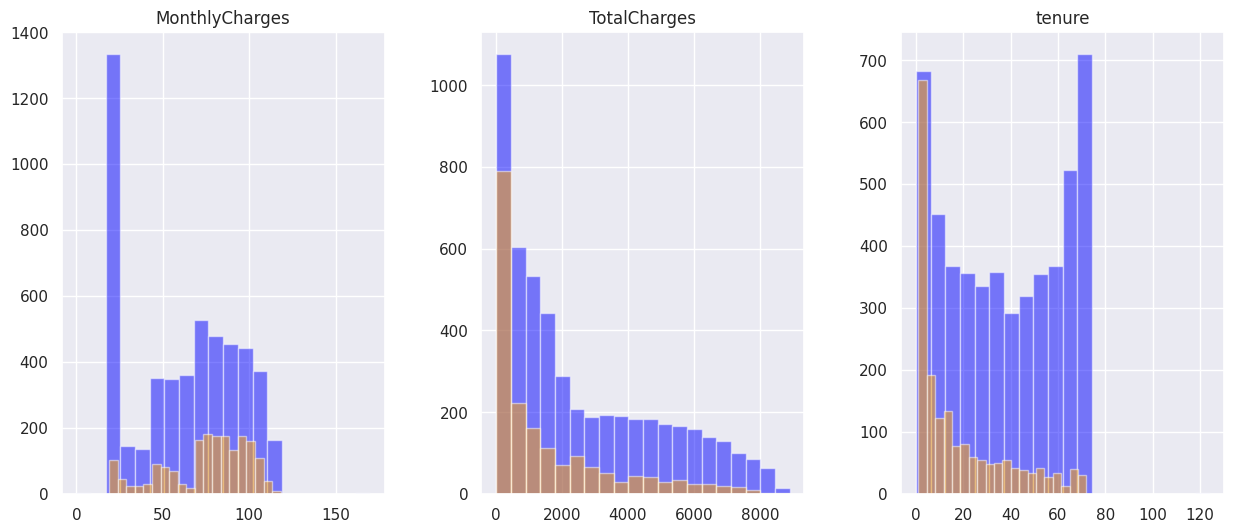

In [31]:
sns.set(style='darkgrid')

# Creating bin in chart
numerical_feature = ['MonthlyCharges','TotalCharges', 'tenure']
fig, ax = plt.subplots(1, 3, figsize=(15,6))

# Plot two overlays of histogram for each numerical_feature
df[df['Churn'] == 'No'][numerical_feature].hist(bins=20, color= 'blue', alpha=0.5, ax=ax)
df[df['Churn'] == 'Yes'][numerical_feature].hist(bins=20, color= 'orange', alpha=0.5, ax=ax)

*   Based on the visulization above, it can be seen that for MonthlyCharges there is a tendency that the smaller the value of monthly fee charged, the smaller the tendency to churn

* For TotalCharge, there seems to be no tendency for customers to churn.

* For tenure, there is a tendency that the longer the customer subscribes, the less tendency to churn.



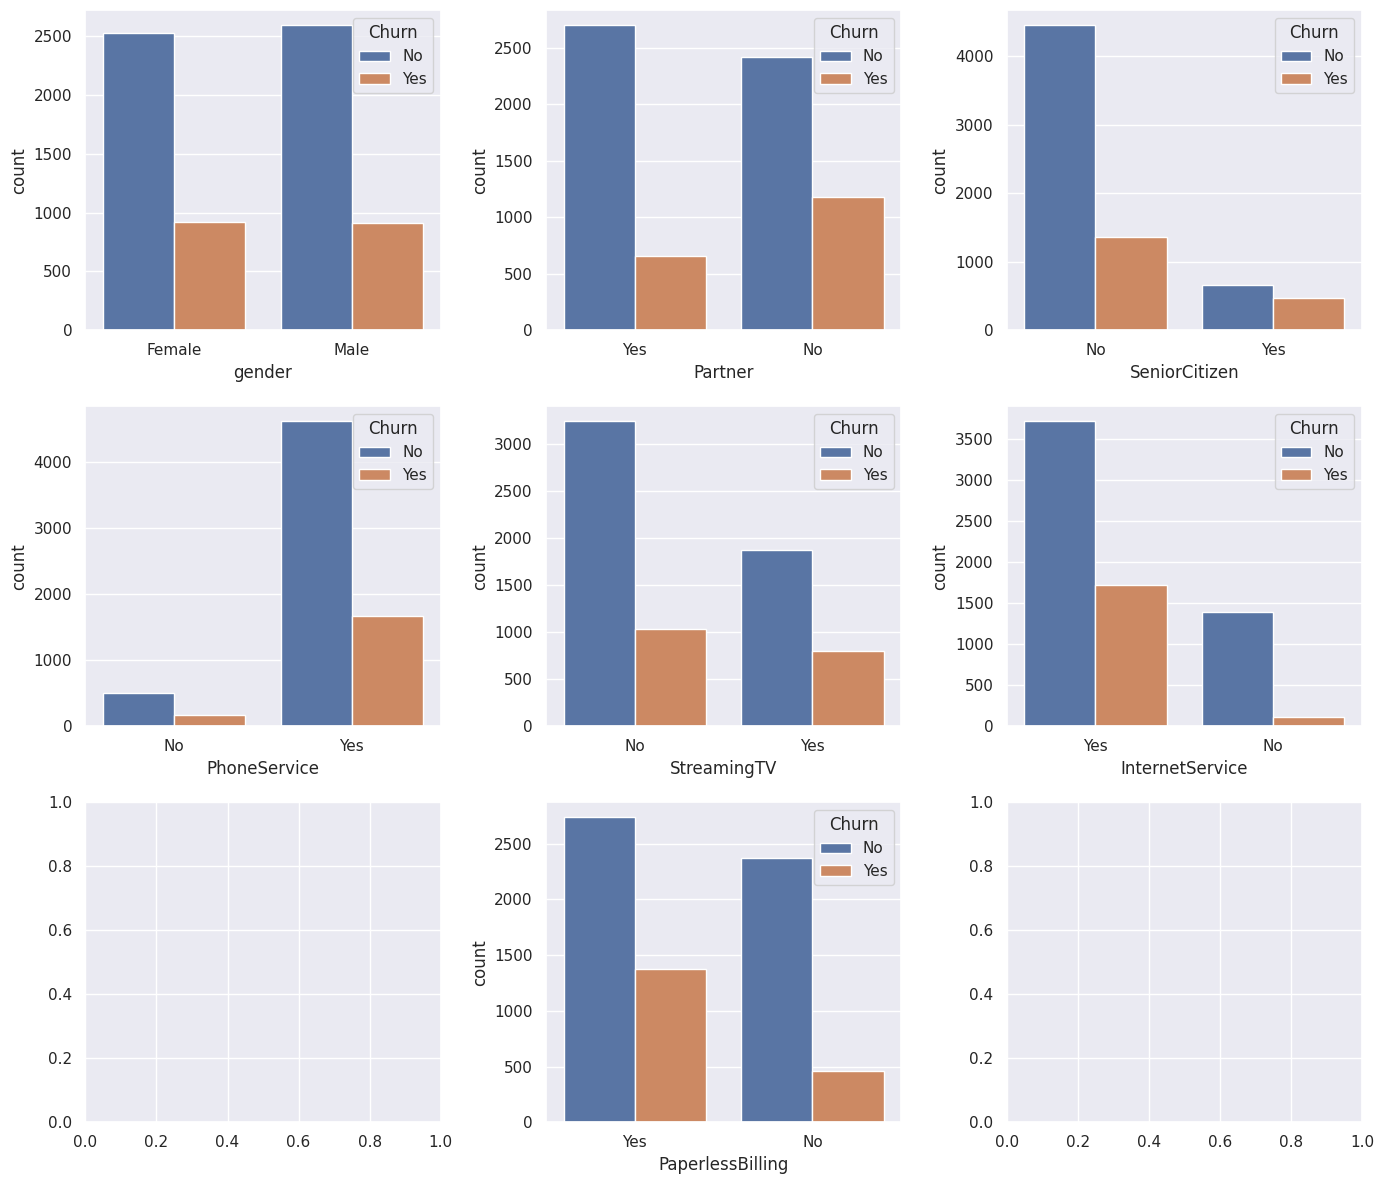

In [32]:
sns.set(style='darkgrid')

# Create a subplots
fig, ax = plt.subplots(3, 3, figsize = (14,12))
sns.countplot(data = df, x ='gender', hue = 'Churn', ax = ax[0][0])
sns.countplot(data = df, x ='Partner', hue = 'Churn', ax = ax[0][1])
sns.countplot(data = df, x ='SeniorCitizen', hue = 'Churn', ax = ax[0][2])
sns.countplot(data = df, x ='PhoneService', hue = 'Churn', ax = ax[1][0])
sns.countplot(data = df, x ='StreamingTV', hue = 'Churn', ax = ax[1][1])
sns.countplot(data = df, x ='InternetService', hue = 'Churn', ax = ax[1][2])
sns.countplot(data = df, x ='PaperlessBilling', hue = 'Churn', ax = ax[2][1])
plt.tight_layout()
plt.show()

Based on the results above, we can see that there is no significant difference for people to churn based on gender and phone service. However, there is a tendency that people who churn are who do not have a partner (partner: No), people who are senior citizens (SeniorCitizen: Yes), people who have streaming TV services (StreamingTV: Yes), people who have internet services (internetService: Yes), and people who have paperless billing (PaperlessBilling: Yes).

**REMOVE THE UNNECESSARY COLUMNS**

Next i will delete the columns that won't be used for machine learning modeling.

In [33]:
# Drop Columns
cleaned_df = df.drop(['customerID', 'UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


**ENCODING DATA**

In [34]:
# convert all non numeric value to numeric (Encoding)
for column in cleaned_df:
  if cleaned_df[column].dtype == np.number: continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

cleaned_df.head()

<ipython-input-34-d2a6cd5d6810>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-34-d2a6cd5d6810>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-34-d2a6cd5d6810>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-34-d2a6cd5d6810>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
<ipython-input-34-d2a6cd5d6810>:3: DeprecationWa

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


**SPLITTING DATASET**

Next i will split cleaned_df dataset into 2 parts (70% for training, 30% for testing)

In [35]:
# Split dataset
# Predictor
X = cleaned_df.drop(['Churn'], axis = 1)
# Target
y = cleaned_df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Total rows and columns from X_train = ', X_train.shape , '\nTotal rows and columns from y_train = ', y_train.shape)
print('\nTotal rows and columns from X_test = ', X_test.shape , '\nTotal rows and columns from y_test = ', y_test.shape)
print('\nChurn percentage in training data =')
print(y_train.value_counts(normalize = True))
print('\nChurn percentage in testing data =')
print(y_test.value_counts(normalize = True)) # normalize = True --> returns the relative frequency by dividing all values by the sum of values


Total rows and columns from X_train =  (4865, 10) 
Total rows and columns from y_train =  (4865,)

Total rows and columns from X_test =  (2085, 10) 
Total rows and columns from y_test =  (2085,)

Churn percentage in training data =
0    0.734841
1    0.265159
Name: Churn, dtype: float64

Churn percentage in testing data =
0    0.738129
1    0.261871
Name: Churn, dtype: float64


total rows and columns of each data are correct & the churn column percentage is also same as the initial data, which shows that the data has been separated properly.

**MODELING DATA : LOGISTIC REGRESSION**

In [36]:
# Modeling data : Logistic Regression

log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah =\n', log_model)

Model Logistic Regression yang terbentuk adalah =
 LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**PERFORMANCE OF THE TRAINING DATA**

After created the model, next do the calculations to get the classification report and confusion matrix on the training data. Use classification_report() & confusion_matrix().

In [37]:
# Predict
y_train_pred = log_model.predict(X_train)

# Print classification report
print('Classification Report Training Model (Logistic Regression')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.79      4865



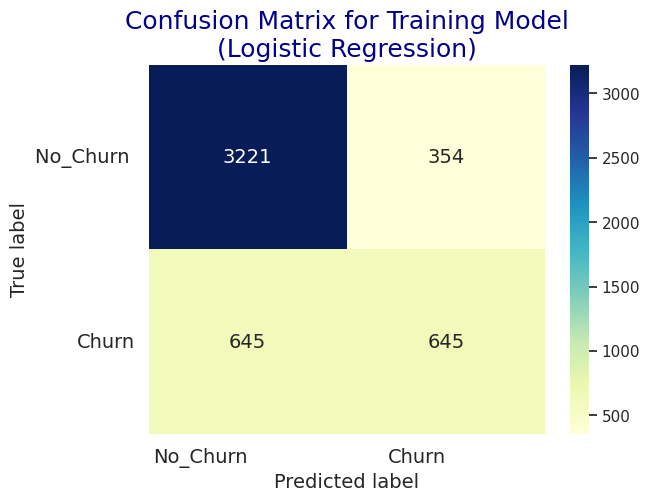

In [38]:
# Confusion matrix visualization
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the training data, it can be seen that the model is able to predict data by producing an accuracy of 79%, with details of churn guesses that are really churn as many as 645, not churn guesses that are really not churn as many as 3221, not churn guesses that are really not churn as many as 645, and churn guesses that are really churn as many as 354.

**PERFORMANCE OF THE TESTING DATA**



In [39]:
y_test_pred = log_model.predict(X_test)
print('Classification Report Testing Model (Logistic Regression: ')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression: 
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.79      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.79      0.79      2085



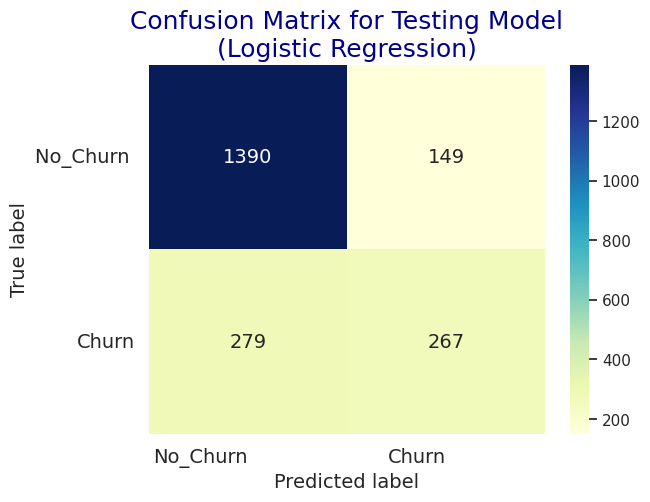

In [40]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the testing data, it can be seen that the model is able to predict the data by producing an accuracy of 79%, with details of churn guesses that are really churn are 267, not churn guesses that are really not churn are 1390, not churn guesses that are really churn are 279 and churn guesses that are really not churn are 149.

**MODELING DATA : RANDOM FOREST**

In [41]:
#RandomForest

rdf_model = RandomForestClassifier().fit(X_train,y_train)
print(rdf_model)

RandomForestClassifier()


**PERFORMANCE OF THE TRAINING DATA**

In [42]:
y_train_pred2 = rdf_model.predict(X_train)
print('Classification Report Testing Model (Random Forest Classifier): ')
print(classification_report(y_train, y_train_pred2))

Classification Report Testing Model (Random Forest Classifier): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



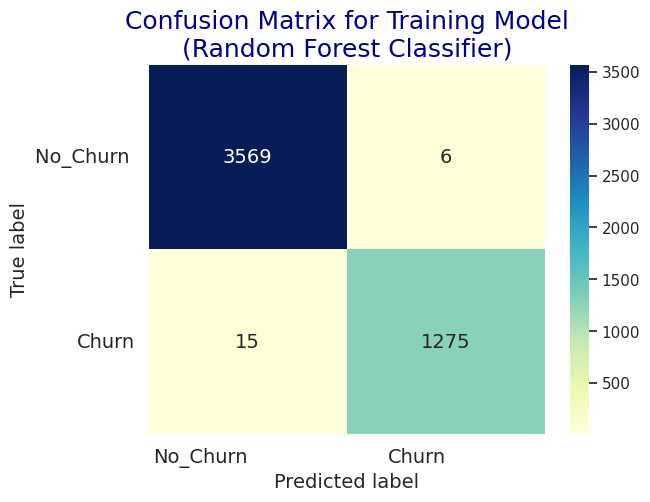

In [43]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred2)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Random Forest Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the training data, it can be seen that the model is able to predict the data by producing 100% accuracy, with details of churn guesses that are really churn is 1276, not churn guesses that are really not churn is 3568, not churn guesses that are really churn is 7 and churn guesses that are really not churn is 14.

**PERFORMANCE OF THE TESTING DATA**

In [44]:
y_test_pred2 = rdf_model.predict(X_test)
print('Classification Report Testing Model (Random Forest Classifier): ')
print(classification_report(y_test,y_test_pred2))

Classification Report Testing Model (Random Forest Classifier): 
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.58      0.48      0.53       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



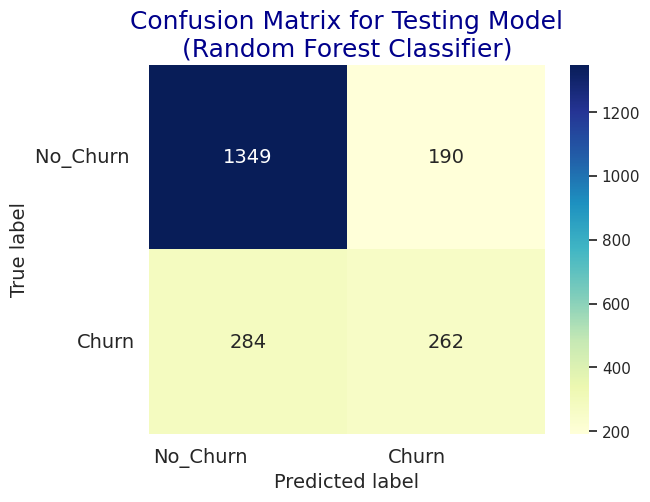

In [45]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred2)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the testing data, it can be seen that the model is able to predict data by producing an accuracy of 78%, with details of churn guesses that are really churn are 263, not churn guesses that are really not churn are 1361, not churn guesses that are really churn are 283 and churn guesses that are really not churn are 178.

**MODELING DATA : GRADIENT BOOSTING CLASSIFIER**


In [46]:
gbt_model = GradientBoostingClassifier().fit(X_train,y_train)
print(gbt_model)

GradientBoostingClassifier()


**PERFORMANCE OF THE TRAINING DATA**

In [47]:
y_train_pred3 = gbt_model.predict(X_train)
print('Classification Report Testing Model (Gradien Boosting Classifier):')
print(classification_report(y_train,y_train_pred3))

Classification Report Testing Model (Gradien Boosting Classifier):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



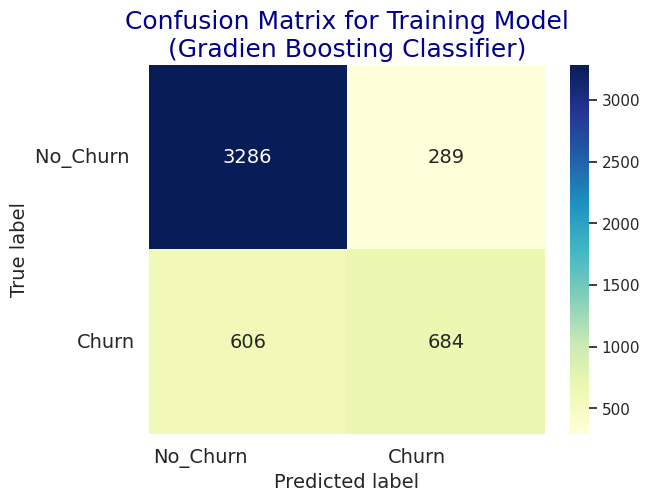

In [48]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred3)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Training Model\n(Gradien Boosting Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the training data, it can be seen that the model is able to predict the data by producing an accuracy of 82%, with details of churn guesses that are really churn are 684, not churn guesses that are really not churn are 3286, not churn guesses that are really not churn are 606, and churn guesses that are really not churn are 289.

**PERFORMANCE OF THE TESTING DATA**

In [49]:
y_test_pred3 = gbt_model.predict(X_test)
print('Classification Report Testing Model (Gradient Boosting Classifier) :')
print(classification_report(y_test,y_test_pred3))

Classification Report Testing Model (Gradient Boosting Classifier) :
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



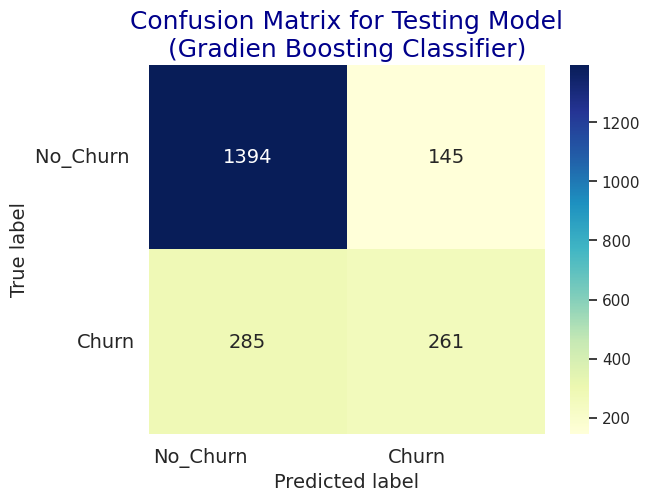

In [50]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred3)), ('No_Churn ', 'Churn'), ('No_Churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot = True, annot_kws={'size' : 14}, fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha='right', fontsize = 14)

plt.title('Confusion Matrix for Testing Model\n(Gradien Boosting Classifier)', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize =14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()

From the testing data, it can be seen that the model is able to predict data by producing an accuracy of 79%, with details of churn guesses that really churn as many as 261, churn guesses that don't really churn as many as 1394, churn guesses that really churn as many as 285, and churn guesses that don't really churn as many as 145.

**DETERMINING THE BEST MODEL**

A good model is a model that is able to provide good performance in the training and testing phases of the model.
1. Over-fitting is a condition where the model is able to predict very well in the training phase, but is unable to predict equally well in the testing phase.
2. Under-Fitting is a condition where the model is less able to predict well in the training phase, but is able to predict well in the testing phase.
3. Appropriate-Fitting is a condition where the model is able to predict well in both the training and testing phases.

Next, we will determine the best algorithm model from the modeling that has been done above (Appropriate-Fitting), then we save it as the best_model_churn.pkl

Based on the modeling that has been done using Logistic Regression, Random Forest and Extreme Gradient Boost, it can be concluded that the best model to predict customer churn is to use the Logistic Regression. This is because the performance of the Logistic Regression model tends to predict equally well in the training and testing phases (79% training accuracy, 79% testing accuracy), while other models tend to over-fit in performance. However, this does not lead us to conclude that if Logistic Regression is used for any modeling, we should still do a lot of model testing to determine which one is the best.

In [51]:
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))
print(log_model)

LogisticRegression()
